# Introduction<a name="introduction"></a>

Admittedly completing this first Capstone project was a challenge for me.  It was a struggle from the start as I spent way too much time looking through the referenced [dataset sources](https://github.com/Thinkful-Ed/data-201-resources/blob/master/data-sources.md).  Not try to deflect any blame, but It really does not take much for a dataset to be [“interesting or significant”](https://courses.thinkful.com/data-201-prepv1/project/4.2.2) to me.  I did finally decide I wanted to do something involved with [association football](https://en.wikipedia.org/wiki/Association_football) and out there on Kaggle I found [this](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).  Solid choice, but then I somehow I ended up on the fivethirtyeight website and decided I could do a better job than their [Global Club Soccer Rankings](https://projects.fivethirtyeight.com/global-club-soccer-rankings/). I was thinking that obviously, Atlanta United should be ranked way higher that 225. That was before the season started.  

Even though the "do better than FiveThirtyEight" was beyond my current capabilities,   I stubbornly pounded my head against the brickwall of self denial. Eventually the wiser voices of Mentor and Program Manager resonated in my bruised and battered head.  Therefore I am slightly proud to present:

# A Prelude to  An Association Football Rankings Analysis



1. [Introduction](#introduction)
4. [Propose Further Research](#Research)
2. [Describe your Dataset](#Data)
    1. [First Round Processing](#DataSub1)
    2. [Second Round Processing](#DataSub2)
    3. [Third Round Processing](#DataSub3)
    
3. [Ask and Answer Analytic Questions](#Analysis)
    1. [Analysis Question One](#AlsSub01)
    2. [Analysis Question Two](#AlsSub02)
    3. [Analysis Question Three](#AlsSub03)
    4. [Analysis Question Four](#AlsSub04)



# Propose Further Research<a name="Research"></a>

Yes, I understand that this should be item four in the above contents. This is the unfocused part and it more accurately reflects how the capstone was done.  The further research is developing or improving analytics based models to rank international and club football teams.  The [FIFA rankings](https://www.fifa.com/fifa-world-ranking/) are how teams are seeded for the World Cup, arguably the world's preeminent sporting event.  The success or failure of national football teams can have serious (and yes irrational results) as exemplified here, here and here.  

While they are first and foremost ranking methodologies, all require a individual match result probability calculation. Therein lies the value of this extensive historical results in this dataset.


1. [ELO Rankings] (https://www.eloratings.net/about)
2. FIFA's version of ELO adopted after the 2018 World Cup.
3. ELO with a modified home field adustment.
4. ELO with a modified result calculation.  
5. Maybe try a Poisson Process methodology in a statistical model.  

This [notebook](modifyELO.ipynb) is the of this future research.  

While they are first and foremost ranking methodologies, all require a individual match result probability calculation. Therein lies the value of this extensive historical results in this dataset.


## Describe your Dataset <a name="Data"></a>
From [Kaggle](https://www.kaggle.com) the data set is [International football results from 1872 to 2018](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017) and includes:
```
date - date of the match
home_team - the name of the home team
away_team - the name of the away team
home_score - full-time home team score including extra time, not including penalty-shootouts
away_score - full-time away team score including extra time, not including penalty-shootouts
tournament - the name of the tournament
city - the name of the city/town/administrative unit where the match was played
country - the name of the country where the match was played
neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
```

The "neutral" column is important when ranking as "home field advantage" effect match results.  "Tournament" is better described as the type of match.  For this dataset it ranges from friendly matches to the World Cup Finals.  This can be used to weight the results based upon the importance of a match.  



*Why is it interesting or significant?* The dataset title and description provide that answer.  "International football results from **1872** to 2018"  and "An up-to-date dataset of nearly **40,000** international football results".  **1872** is a long time ago and **40,000** is a lot of results. 

*Where does it come from?* Round of applause for the [man](https://www.kaggle.com/martj42) behind the this "brilliant" … it’s a football thing … dataset. 




In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use = 'ggplot'


# First Round of Processing<a name="DataSub1"></a> 

No significant issue reading the csv file into a pandas DataFrame. With no parsing except for defining the date column as a date object and verifying the other data types. For this round of data processing, the goal is a DataFrame as follows:

|   date   |  home_team  |  away_team  |  home_score  |  away_score  |  tournament  |  neutral  |
| -------- | ----------- | ----------- | ------------ | ------------ | ------------ | --------  | 
| date obj |   string    |   string    |     int      |     int      |   string     |   bool    | 



In [3]:
# process the csv data file into DataFrame
def process_1():  
    file_read = 'results.csv'; file_writ = 'results_df.csv'
    df = pd.read_csv(file_read, parse_dates=[0])
    df = df.drop(['city', 'country'], axis=1) 
    
    df.to_csv(file_writ, index=False)
    return df

df1 = process_1();df1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,False
1,1873-03-08,England,Scotland,4,2,Friendly,False


## Second Round of Processing  <a name="DataSub2"></a>

This next processing round is only seperating the data into different time ranges.  While constructing  these date segregated DataFrames are important to future modeling, it’s not with respect to this project. The end result of this second round is:

|      date       |  home_team  |  away_team  |  home_score  |  away_score  |  tournament  |  neutral  |
| -------- | ----------- | ----------- | ------------ | ------------ | ------------ | --------  | 
| date obj |   string    |   string    |     int      |     int      |   string     |   bool    | 

The period begins after of the 1978 World Cup and ends at the conclusion of the 2018 World Cup.  This coincides with the expansion of the World Cup Field to 32 teams.  Overall this era includes more competitive teams and increased results for those teams.

In [4]:
# takes process_1(df) and returns df within begin / end timespan
def process_2(df1, begin, end):         
    df = df1[df1['date'] >= begin]
    df = df[df['date'] <= end] 
    df.index = range(len(df))
    return df

begin = pd.Timestamp('1978-06-26') #  1978 World Cup ends
end = pd.Timestamp('2018-07-16') #  2018 World Cup ends
df2 = process_2(df1, begin, end); df2.head(5)

,date,home_team,away_team,home_score,away_score,tournament,neutral
0,1978-06-28,Iceland,Denmark,0,0,Friendly,False
1,1978-06-28,Sweden,Finland,2,1,Nordic Championship,False
2,1978-07-02,Algeria,Iraq,1,1,Friendly,False
3,1978-07-02,Guadeloupe,Jamaica,1,0,CFU Caribbean Cup qualification,False
4,1978-07-04,Algeria,Iraq,0,0,Friendly,False


## Third Round of Processing  <a name="DataSub3"></a>

Exploding the the DataFrame rows so that there is only a single team per row.  This does facilitate some of the later visualations in this report, but once again it is only truly necessary for "further research".  Individualy inserting rows involves extensive processing time.  the approach is to create a new DataFrame from the current DataFrame columns through modified column lists and then using vectorized methods to create any mecessay new columns I need. This is the final goal:

|   date   |  team  |  home  |  score  |  concede  |  gdf   |  win  |  draw  |  result  |
| -------- | ------ | ------ | ------- | --------- | ------ | ----- | ------ | -------- |    
| date obj | string |  bool  |   int   |    int    | string | bool  |  bool  |  float   |



In [5]:
# process df2 before exploding rows
def before_explode(df):
    df = df.drop(['tournament'], axis=1)
    return df
# columns that can be added with vectorized method after new df created
def after_explode(df):
    df['gdf']      = np.subtract(df.score, df.concede)
    df['draw']     = np.where(df['gdf'] == 0, True, False)
    df['win']      = np.where(df.gdf > 0, True, False)
    df['result']   = np.where((df.win),3 ,0) +  np.where((df.draw),1 ,0)
    df['gdf']      = df.gdf.abs()      
    return(df)
# process 2   ==>  ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'neutral'] 
# process 3.1 ==>  ['date', 'home_team', 'away_team', 'home_score', 'away_score','neutral', 'home']
# process 3.2 ==>  ['date', 'team', 'home', 'score', 'concede']
# process 3.3 ==>  ['date', 'team', 'home', 'score', 'concede', 'gdf', 'win', 'draw', 'result']
def process_3(df2): 
    ret = pd.DataFrame()     
    labels = ['date', 'team', 'home', 'neutral','score', 'concede']
    date = []; team = []; home =[]; score =[]; concede =[]; neutral = []
    df = before_explode(df2)
    for i in range(len(df)):     # create new col lists with 
        date.append(df.iat[i,0]);     date.append(df.iat[i,0])
        team.append(df.iat[i,1]);     team.append(df.iat[i,2])
        home.append(not df.iat[i,5]); home.append(False)
        score.append(df.iat[i,3]);    score.append(df.iat[i,4])
        concede.append(df.iat[i,4]);  concede.append(df.iat[i,3]) 
        neutral.append(df.iat[i,5]);  neutral.append(df.iat[i,5]) 
    for col in labels:
        ret[col] = pd.Series(eval(col))    
    ret =  after_explode(ret)
    return  ret

df3 = process_3(df2); df3.head(2)

,date,team,home,neutral,score,concede,gdf,draw,win,result
0,1978-06-28,Iceland,True,False,0,0,0,True,False,1
1,1978-06-28,Denmark,False,False,0,0,0,True,False,1


## Ask and Answer Analytic Questions <a name="Analysis"></a>

The result column is created using the typical football standings approach of awarding 3 points for a win and 1 point for a tie.  This metric allows for some qualitative analysis.  Specifically for this dataset we can select a group of 5 "best" teams for comparisons.  But to start with: 

# Let's Look at Goal Differential <a name="AlsSub01"></a>

Football is a low scoring, that's one of the reasons that developing a statistical model is difficult.  Because no matter what the purest of the football purist says, there are lucky goals. Plus in the dreaded "Further Research", I will propose that the "best" result is a 2-0 (or better stated as dos y cero) win. 

Analytic Question One - What is the typical Goal Differential? Let's look at some stats.  

In [6]:
print('Goal Differential mean = %3.2f, that seems reasonable' % df3.gdf.mean())
print('Goal Differential standard deviation = %3.2f, that causes some pause ' % df3.gdf.std())
print('Goal Differential maximum = %i, that could be an issue' % df3.gdf.max())
print("Goal Differential 99th percentile = %i, let's look into this" % np.percentile(df3.gdf, 99))

Goal Differential mean = 1.61, that seems reasonable
Goal Differential standard deviation = 1.72, that causes some pause 
Goal Differential maximum = 31, that could be an issue
Goal Differential 99th percentile = 8, let's look into this


Looking further into the data there were over 200 games with goal differentials of more that 8. How do things look if we call those outliers. 

In [7]:
# another round of processing to eliminate games with a gdf > 8
def process_4(df3):
    df = df3[df3.gdf <= 8]
    return df
df4 = process_4(df3)
print('Mean changes from %3.2f to %3.2f and Standard Deviation changes from %3.2f to %3.2f'
                         % (df3.gdf.mean(), df4.gdf.mean(), df3.gdf.std(), df4.gdf.std() ))
print("Goal Differential 75th percentile = %i" % np.percentile(df4.gdf, 75))

Mean changes from 1.61 to 1.54 and Standard Deviation changes from 1.72 to 1.48
Goal Differential 75th percentile = 2


Now let's look at a historgram of the goal differential

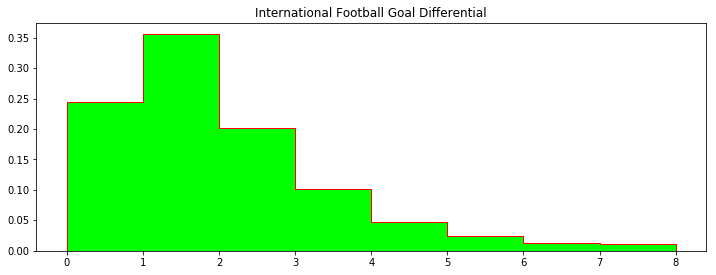

In [73]:
x = df4.gdf
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, aspect=8)
ax.hist(x,bins=8, density=True, color='lime')
ax.hist(x,bins=8, density=True, color='red', histtype='step')

ax.set_title('International Football Goal Differential')
plt.show()


# Who's Number One? <a name="AlsSub02"></a>

Analytic Question Two - For this time period, which teams performed the best? And how does this "result" statitic ranking compare to much more sophisticated ranking systems? 

Initially, let's select the five teams with the highest "result" mean.

In [36]:
gb = df4.groupby('team')['result'].mean()
df_rm = pd.DataFrame(gb).sort_values(by='result', ascending=False)
df_rm.head()

,result
team,
Padania,2.297297
Jersey,2.246575
Brazil,2.142857
County of Nice,2.111111
Spain,2.059735


Admittedly not the expected result and with the exception of Brazil and Spain these are not your typical football powerhouse teams. It's probably fair to describe the other three teams as obscure.  After a little research, [Padania](https://en.wikipedia.org/wiki/Padania) is not really a nation.   Those "obscure" national teams are [CONIFA](https://en.wikipedia.org/wiki/Confederation_of_Independent_Football_Associations) members.  As non-FIFA members they are not eligible to participate in the World Cup.  Instead of a further data processing to inlude only FIFA nations, let's check on some team statistics for "games played" in the dataset.    

In [37]:
#count how many matches per team 
gb1 = df4.groupby('team')['result'].count()
df_rc = pd.DataFrame(gb1)
df_rc['team'] = df_rc.index;df_rc.index = range(len(df_rc))
print("The mean for matches played in this dataset is %d and the standard deviation is %d" %  (df_rc.mean(),df_rc.std()))

The mean for matches played in this dataset is 201 and the standard deviation is 163


Let's eliminate any teams with less 100 results. 

In [38]:
df_100 = df_rc.where(df_rc.result >= 100)
df = df_rm[df_rm.index.isin(df_100.team)][0:5]
best_teams = df.index.tolist(); dfbest = df4[df4.team.isin(best_teams)]
best_teams

['Brazil', 'Spain', 'Germany', 'France', 'Iran']

Here's the [FIFA  Rankings](https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12210) and the [ELO rankings](https://www.eloratings.net/2018_World_Cup) at same point in time.  

| **Rating Systems**  |   **"Result" Rankings**      | **Elo Ratings** | **FIFA Rankings** |
|:-----------------:|:------------:|:---------------:|:---------------:|
|**Brazil**|**1**|**2**|**2**|
|**Spain**|**2**|**4**|**10**|
|**Germany**|**3**|**5**|**1**|
|**France**|**4**|**1**|**7**|
|**Iran**|**5**|**20**|**37**|

Is it surprising that four of the five top ranked ELO ranked were likewise identified by just analyzing win, loss and tie results?  Maybe not.

- The data involved, match results is nearly the same.  Actually the [International football results from 1872 to 2018](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017) eliminated some lower quality matches where teams "B" teams participated.  Note to "future research", evaluate how to weight match results based upon importance of the match. Winning the World Cup should bring a very large positive adjustment.  

- Both ranking systems are cumulative in nature.  Meaning that there is a rating that is adjusted up or down based upon individual match results.  

- Even though the team's players change over time, the "best" national teams seem to stay in that best category.  For the 32 team World Cup era, the four teams identified in both top 5 rankings have won 7 of the 10 world cups. Note to "future research", evaluate "regressing to the mean" Every year? Every four year World Cup cycle?
 
Why are are the FIFA rankings not included in the above discussion?  FIFA adopted a ELO-like ranking system after the 2018 World Cup.


# Defense Wins? <a name="AlsSub03"></a>

Sure you win by scoring more goals, but you never lose with a "clean sheet" ... that's when the other team does not score. A simple way to look at average goals scored and average goals conceded for the best teams compared to the medicore.



In [39]:
# scoring for best teams
score = []; concede = []
gb = dfbest.groupby('team').mean()
for team in best_teams:
    score.append(gb.score[team])
    concede.append(gb.concede[team])
score.append(df4.score.mean());concede.append(df4.concede.mean()); best_teams.append('Average')

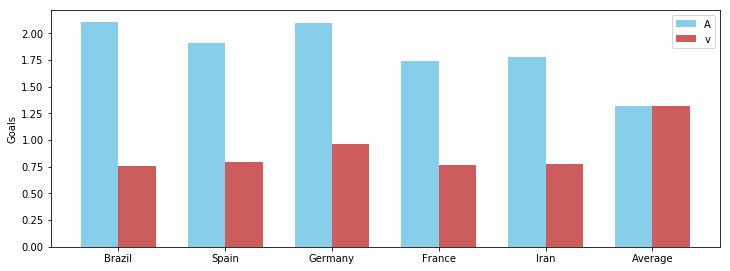

In [41]:
blue = score; red = concede; width = 0.35  # the width of the bars
ind = np.arange(len(score))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)
rects1 = ax.bar(ind - width/2, blue, width, color='SkyBlue', label='Goals Scored')
rects2 = ax.bar(ind + width/2, red, width, color='IndianRed', label='Goals Conceded')
ax.set_ylabel('Goals')
ax.set_title('')
ax.set_xticks(ind)
ax.set_xticklabels(best_teams)
ax.legend('Average Goals Scored and Conceded')
plt.show()

 # Is there a home field advantage?<a name="AlsSub04"></a>

In team sports, home records are almost always better than away records.  With the ELO rankings for two equal teams, the home team's win probability increases from 0.50 to 0.64. 

Analytic Question four - Do teams play better in their home field? Is the home field advantage so signicant that these matches differ statistically than neutral field matches? Let's look at some statistics for "home team" results compared to match results played on a neutral field.

In [42]:
df_home = df4[df4.home == True]
df_ntrl = df4[df4.neutral == True]
hme_rslt = df_home.result.mean();  ntrl_rslt = df_ntrl.result.mean()
hme_scre = df_home.score.mean();   ntrl_scre = df_ntrl.score.mean()
hme_cncd = df_home.concede.mean(); ntrl_cncd = df_ntrl.concede.mean()

print("Home field  result mean is %5.2f as compared to the overall dataset value of %5.2f" % (hme_rslt,ntrl_rslt))
print("Home field  goals scored  mean of %5.2f  as as compared to the overall dataset value of %5.2f" %(hme_scre, ntrl_scre))
print("Home field  goals conceded mean of %3.2f as as compared to the overall dataset value of %3.2f" % (hme_cncd, ntrl_cncd))

Home field  result mean is  1.75 as compared to the overall dataset value of  1.38
Home field  goals scored  mean of  1.61  as as compared to the overall dataset value of  1.37
Home field  goals conceded mean of 0.99 as as compared to the overall dataset value of 1.37


A quick look at the continous variables utilizing bar histograms.  Nothing unexpected or dramatic in these plots.  The significance here is that the plots suggest that home field and neutral field probaliby functions are the same.  

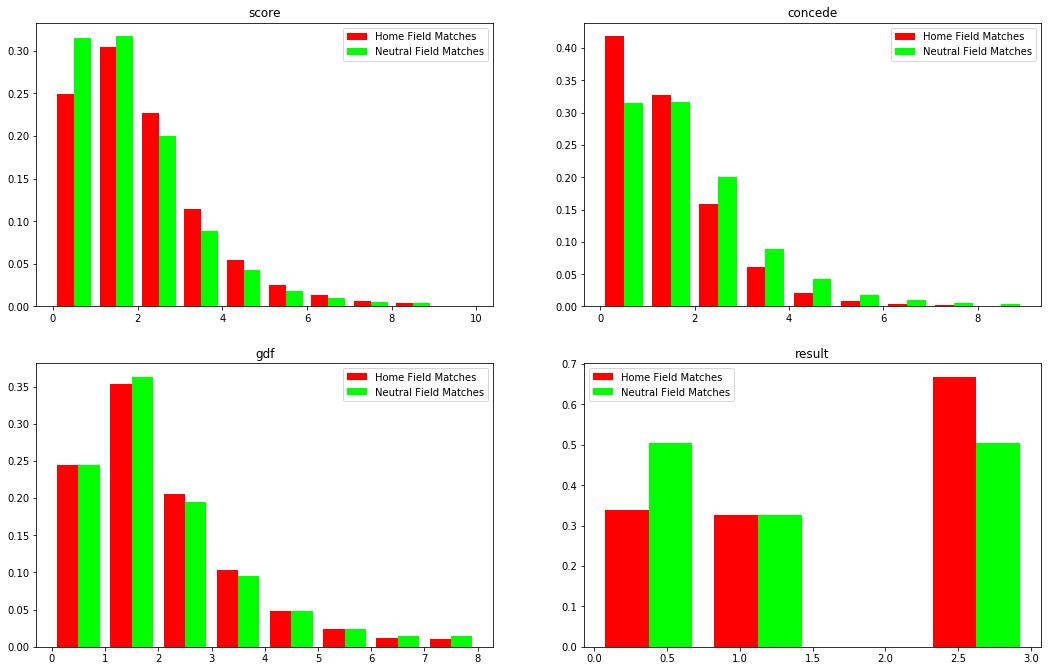

In [72]:
def hist_bars_2(df1, df2, cols, label):
    colors = ['red','lime']; col_wdth = 9; row_hght = 6; ncols = 2 # given
    cols = cols; label = label; nrows = len(cols)                  # 
    fig = plt.figure(1, (col_wdth * ncols, row_hght * nrows))
    index = 0
    nbins = {'score':10, 'concede':9, 'gdf':8, 'result':3}
    for col in cols:
        index += 1
        ax = plt.subplot(nrows, ncols, index)
        pop1 = getattr(df1, col).tolist()
        pop2 = getattr(df2, col).tolist()
        x = (pop1, pop2)
        ax.hist(x, bins=nbins[col],density=True, histtype='bar', color=colors, label=label)
        ax.legend(prop={'size': 10})
        ax.set_title(col)
    plt.show()
    return 

cols = ['score', 'concede', 'gdf', 'result']
labels = ['Home Field Matches', 'Neutral Field Matches']
hist_bars_2(df_home, df_ntrl, cols, labels )